<a href="https://colab.research.google.com/github/Pathin220/4105_ML/blob/main/4105_Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [767]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [768]:
file_path = '/content/drive/My Drive/Machine Learning/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [769]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [770]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train, val = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [771]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

train[num_vars] = scaler.fit_transform(train[num_vars])
train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.596970,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,0.527273,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,0.404242,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,0.363636,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,0.109091,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [772]:
#create colum vectors from data
train_price = train['price']
val_price = val['price']


In [773]:
#Necessary Variables
alpha = 0.000000001
theta_a = np.zeros(6)
theta_b = np.zeros(12)
iterations = 1500
m = len(train_price)
m_val = len(val_price)



In [774]:
#1a. Area, bedrooms, bathrooms, stories, parking will be used
vars_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
train_a = np.c_[np.ones((len(train_price),1)), train[vars_a]]
val_a = np.c_[np.ones((m_val,1)), val[vars_a]]



In [775]:
#1b area, bedrooms, bathrooms, stoires, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea will be used
vars_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking','prefarea']
train_b = np.c_[np.ones((len(train_price),1)), train[vars_b]]
val_b = np.c_[np.ones((m_val,1)), val[vars_b]]

In [776]:
#function for gradient descent
def grad_descent(train,val,train_price,val_price,alpha,theta,iterations):
  train_losses = []
  val_losses = []

  for iteration in range(iterations):
    gradients = (2/len(train_price)) * train.T.dot(train.dot(theta) -train_price)
    theta -= alpha * gradients

    train_loss = (1/len(train_price)) * np.sum(np.square(train.dot(theta) - train_price))
    val_loss = (1/len(val_price)) * np.sum(np.square(val.dot(theta) - val_price))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    return train_losses, val_losses



ValueError: ignored

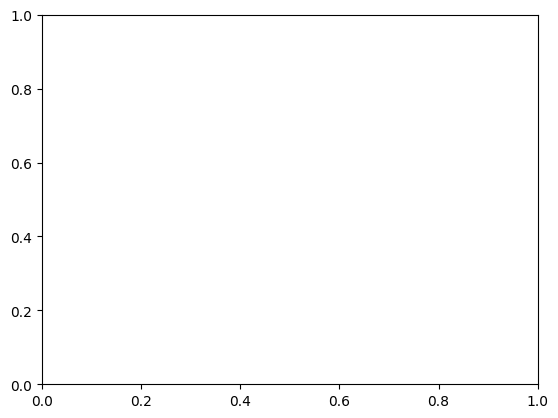

In [780]:

train_losses, val_losses = grad_descent(train_a,val_a,train_price,val_price,alpha,theta_a,iterations)

plt.plot(range(1, iterations + 1), train_losses, color = 'blue', label="Training Loss")
plt.plot(range(1, iterations + 1), val_losses, color = 'red', label="Valadation Loss")


plt.grid(True)
plt.title("Training and Validation Loss Over Iterations")
plt.show()



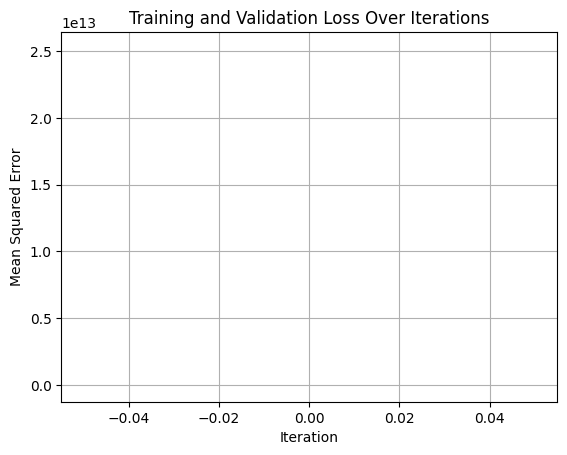

In [778]:
train_losses, val_losses = grad_descent(train_b,val_b,train_price,val_price,alpha,theta_b,iterations)

plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")

plt.grid(True)
plt.title("Training and Validation Loss Over Iterations")
plt.show()